# Double 7's (Short Term Trading Strategies that Work)

    1. The Security is above its 200-day moving average or X-day ma
    2. The Security closes at a 7-day low, buy.
    3. If the Security closes at a 7-day high, sell your long position.

In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd

import pinkfish as pf
import strategy

# Format price data.
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# Set size of inline plots.
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
#symbol = 'OIH'
#symbol = 'NLY'

capital = 10000
#start = datetime.datetime(2015, 1, 1)
start = datetime.datetime(*pf.SP500_BEGIN)
end = datetime.datetime.now()

Run Strategy

In [4]:
# options = {
#     'use_adj' : False,
#     'use_cache' : True,
#     'stop_loss_pct' : 0.15,
#     'margin' : 2.0,
#     'period' : 7,
#     'sma' : 70,
#     'use_regime_filter' : True
# }

options = {
    'use_adj' : False,
    'use_cache' : True,
    'stop_loss_pct' : 0.15,
    'margin' : 2,
    'period' : 7,
    'sma' : 70,
    'use_regime_filter' : True
}

s = strategy.Strategy(symbol, capital, start, end, options)
s.run()

View logs

In [5]:
s.tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
327,2024-09-03,552.08,2024-09-11,554.42,2.34,7324.09,3130,861360.32,LONG,SPY
328,2024-10-01,568.62,2024-10-09,577.14,8.52,26105.34,3064,887465.66,LONG,SPY
329,2024-10-23,577.99,2024-11-06,591.04,13.05,40520.21,3105,927985.88,LONG,SPY
330,2024-11-15,585.75,2024-11-22,595.51,9.76,31251.55,3202,959237.43,LONG,SPY
331,2024-12-10,602.80,2024-12-27,595.01,-7.79,-25044.78,3215,934192.65,LONG,SPY


In [6]:
s.dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2024-12-20,931782.80,931782.80,931782.80,3215,-968764.53,2.04,-
2024-12-23,943163.83,943163.83,943163.83,3215,-968764.53,2.03,-
2024-12-24,964414.93,964414.93,964414.93,3215,-968764.53,2.00,-
2024-12-26,964543.65,964543.65,964543.65,3215,-968764.53,2.00,-
2024-12-27,944192.65,944192.65,944192.65,0,944192.65,1.00,X


Generate strategy stats - display all available stats

In [7]:
pf.print_full(s.stats)

start                                                   1993-11-11
end                                                     2024-12-27
beginning_balance                                            10000
ending_balance                                           944192.65
total_net_profit                                         934192.65
gross_profit                                            2083407.67
gross_loss                                             -1149215.02
profit_factor                                                 1.81
return_on_initial_capital                                  9341.93
annual_return_rate                                           15.73
trading_period                           31 years 1 months 16 days
pct_time_in_market                                           32.16
margin                                                           2
avg_leverage                                                  1.33
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [8]:
benchmark = pf.Benchmark(symbol, capital, s.start, s.end, use_adj=True)
benchmark.run()

Plot Equity Curves: Strategy vs Benchmark

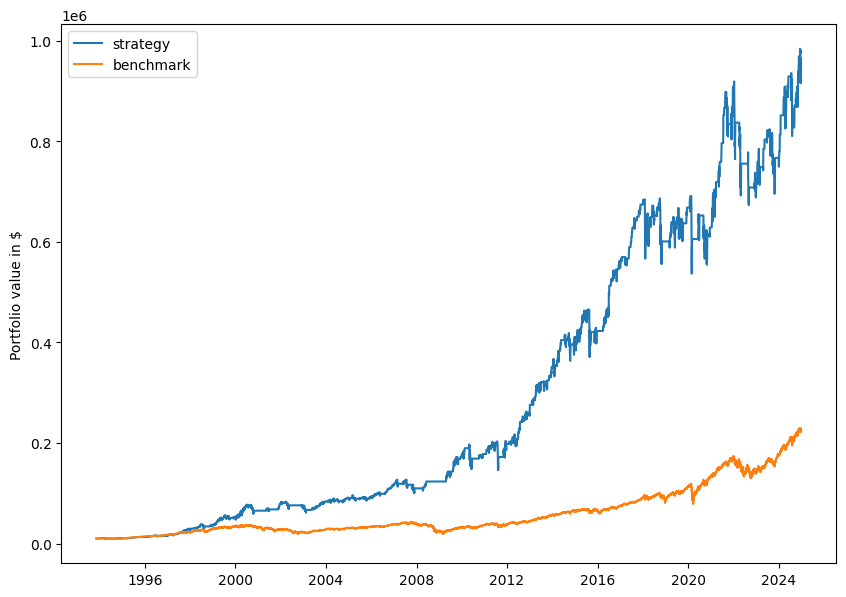

In [9]:
pf.plot_equity_curve(s.dbal, benchmark=benchmark.dbal)

Plot Trades

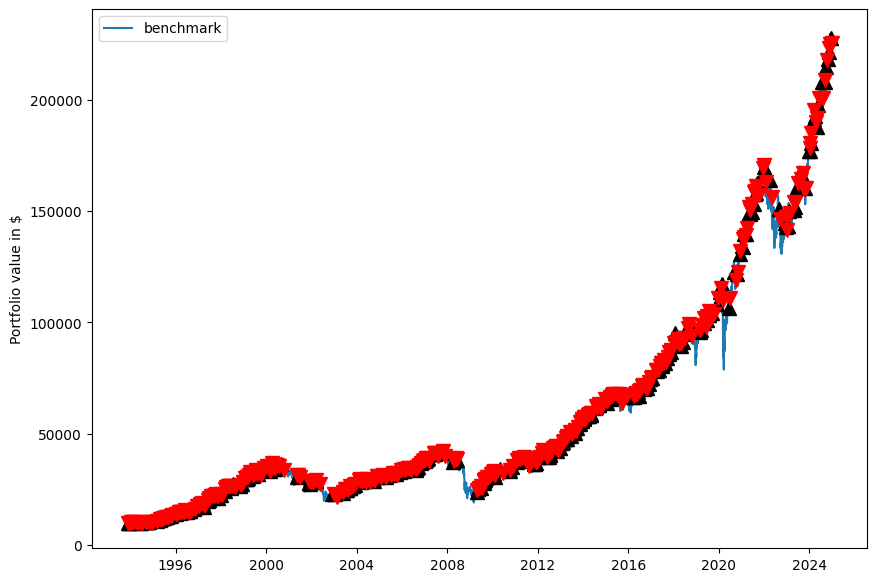

In [10]:
pf.plot_trades(s.dbal, benchmark=benchmark.dbal)

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,15.73,10.53
max_closed_out_drawdown,-28.09,-55.18
annualized_return_over_max_drawdown,0.56,0.19
best_month,28.01,23.61
worst_month,-27.26,-30.98
sharpe_ratio,0.79,0.63
sortino_ratio,0.62,0.80
monthly_std,4.52,4.49
annual_std,19.15,17.21


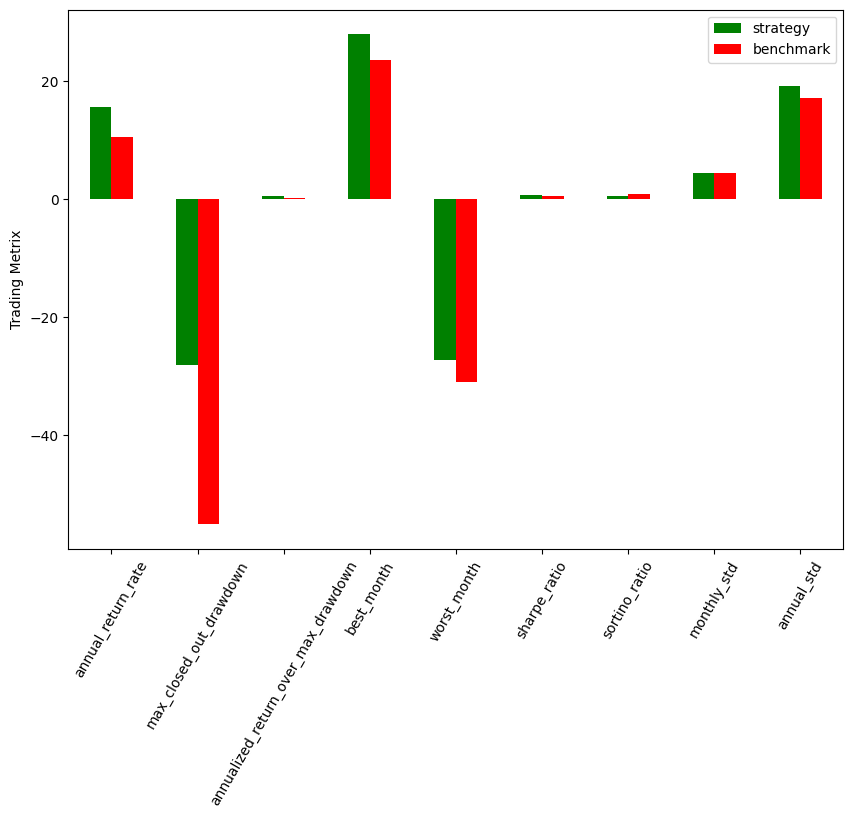

In [11]:
df = pf.plot_bar_graph(s.stats, benchmark.stats)
df

Plot Instrument Risk vs Strategy Risk

,SPY,Strategy
avg,0.16,0.15
median,0.13,0.14
min,0.03,0.00
max,0.96,0.96
std,0.11,0.14
last,0.14,0.27


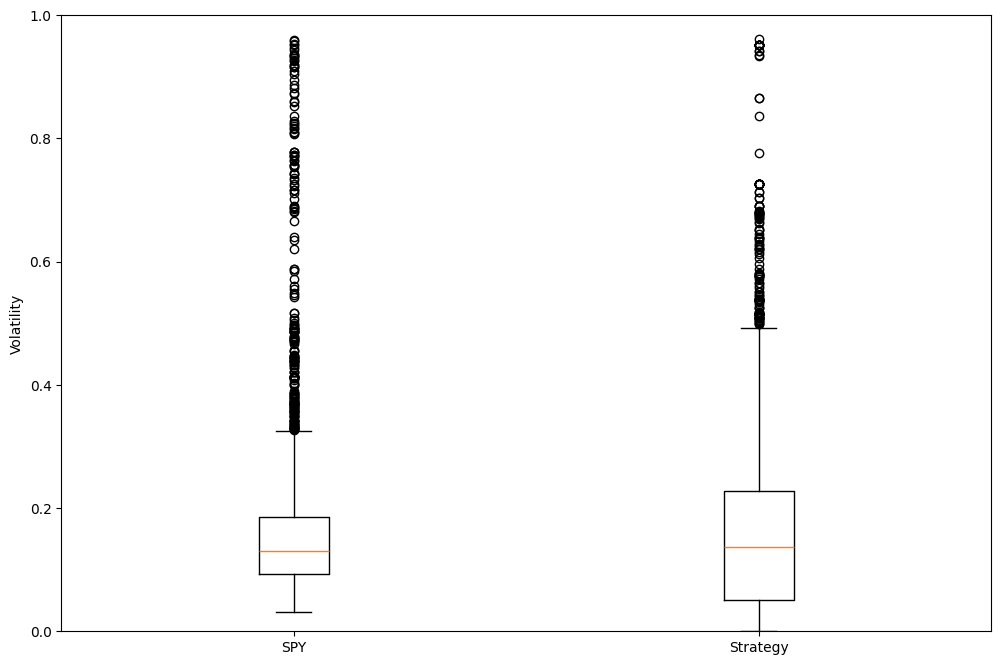

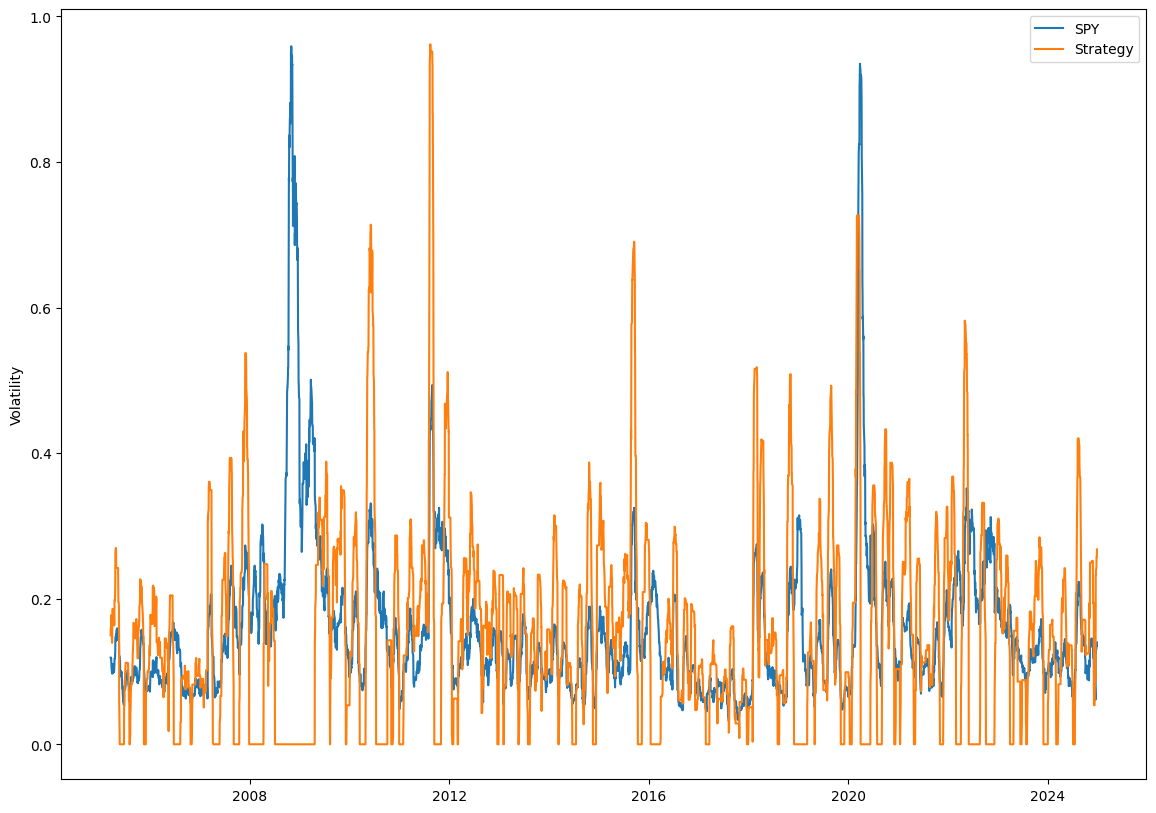

In [12]:
df = pf.volatility_graphs([s.ts, s.dbal], [symbol, 'Strategy'], points_to_plot=5000)
df

Prettier Graphs

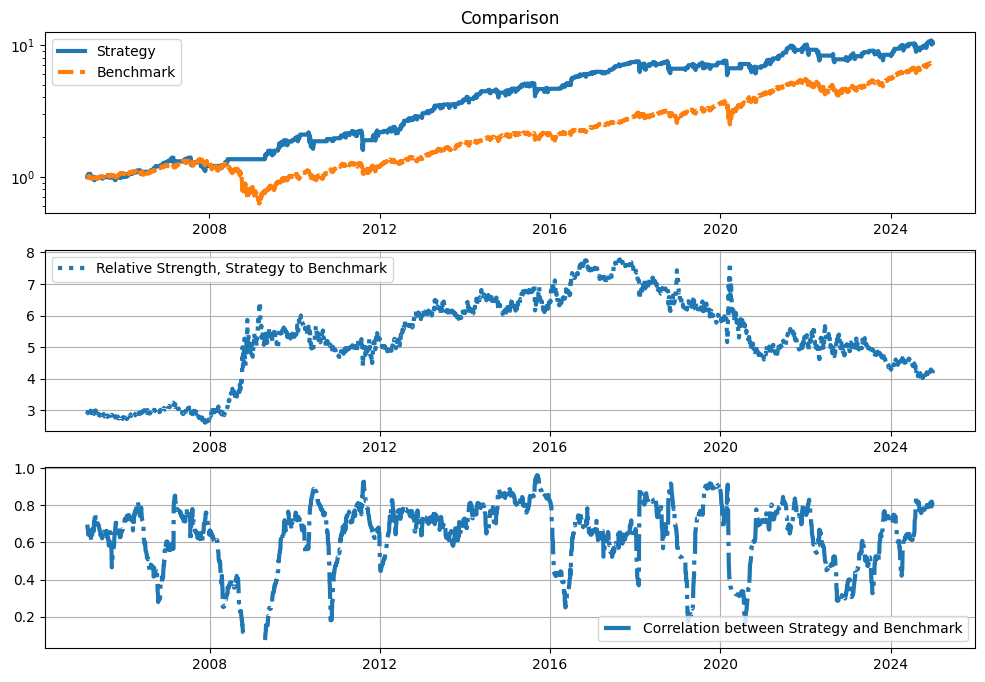

In [13]:
returns = s.dbal['close']
benchmark_returns = benchmark.dbal['close']
pf.prettier_graphs(returns, benchmark_returns, dbal_label='Strategy', benchmark_label='Benchmark', points_to_plot=5000)

In [14]:
pf.kelly_criterion(s.stats, benchmark.stats)

sharpe_ratio            0.79
sharpe_ratio_max        0.83
sharpe_ratio_min        0.75
strategy risk           0.19
instrument risk         0.17
optimal target risk     0.79
half kelly criterion    0.40
aggressive leverage     4.61
moderate leverage       2.30
conservative leverage   2.19
dtype: float64